# Analysis of Employee performance from 2019 to 2020
6 Metrics:

1. Aht (seconds/call)
2. Unplanned out (%)
3. Mean attrition (%)
4. Mean conformance (%)
5. Mean monthly system outage (hours)
6. Mean shrinkage (%)

# Load Data

In [338]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('wfh3.csv')
df.rename(columns={'ACTIVITY DATE': 'date', 'BUSINESS UNIT': 'bu'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['aht'] = df['TOTAL TIME - AHT (sec)'] / df['VOLUME - HANDLED']

df.head()

,date,bu,VOLUME - HANDLED,TOTAL TIME - AHT (sec),AHT CALC,Sum of PRODUCTIVE TIME - ACTUAL (hrs),Sum of PRODUCTIVE TIME - SCHEDULED (hrs),Conformance CALC,Attrition,EOM Headcount,Attrition % CALC,System Outage (hrs),Unplanned out,Shrinkage,Regular Scheduled Time (no OT),Unplanned out % CALC,Shrinkage % CALC,month,year,aht
0,2019-01-01,Client Transactions,290,0,0,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,0.000000
1,2019-01-01,Participant Transactions,429,0,0,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,0.000000
2,2019-01-01,RAM,1072,1315240,1226.902985,360.443889,507.5,0.710234264,0,0,NaN,0.0,0.0,115.25,656.25,0%,18%,January,2019,1226.902985
3,2019-01-01,RCS PHONES,0,0,#DIV/0!,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,NaN
4,2019-01-01,RIS,3,105,35,0.000000,0.0,#DIV/0!,0,0,NaN,0.0,0.0,0.00,0.00,#DIV/0!,#DIV/0!,January,2019,35.000000


# Fix attrition to repeat

In [357]:
att = pd.read_csv('attrition.csv')

att.head()

,BUSINESS UNIT,last date of month,attrition,filled position,Attrition %,month,year
0,Client Transactions,1/31/2019,2,47,0.042553191,January,2019
1,Participant Transactions,1/31/2019,2,59,0.033898305,January,2019
2,RAM,1/31/2019,2,89,0.02247191,January,2019
3,RCS PHONES,1/31/2019,2,20,0.1,January,2019
4,RIS,1/31/2019,2,126,0.015873016,January,2019


In [363]:
att['Attrition %'] = pd.to_numeric(att['Attrition %'], errors='coerce')

In [ ]:
att = att.drop('last date of month', 1)

In [364]:
att.to_csv('attrition_clean.csv')

In [340]:
# def replace_attrition(df):
#     for year in df['year'].unique():
#         for bu in df['bu'].unique():
#             for month in df['month'].unique():
#                 df[(df['year']==year) & (df['bu']==bu) & (df['month']==month)].fillna(method='backfill')
# #                 month = df[(df['year']==year) & (df['bu']==bu) & (df['month']==month)]
# #                 val = month[month['date']==month['date'].max()]['Attrition % CALC']
# #                 print(val.values[0])
# #                 df.loc[month.index,'Attrition % CALC'] = val.values*df.loc[month.index,'Attrition % CALC'].shape[0]
# #                 display(df.loc[month.index,'Attrition % CALC'])
# #                 print(month['Attrition % CALC'])
#                 break
#             break
#         break
#                 #                 df.loc[(df['year']==year) & (df['bu']==bu) & (df['month']==month)]['Attrition % CALC'] = new
# #                 display(df[(df['year']==year) & (df['bu']==bu) & (df['month']==month)])
# #                 display(df[(df['year']==year) & (df['bu']==bu) & (df['month']==month)])
#                 #             to_replace = df[(df['year']==year) & (df['bu']==bu) & (df['month']==month) & (df['Attrition % CALC'].isnull())].fillna(fill.values[0])
#     #             df.replace(to_replace=)

# print(replace_attrition(df))



In [341]:
month = df[(df['year']==2019)& (df['month']=='January') & (df['bu']=='RAM')]

month['date'].max()

Timestamp('2019-01-31 00:00:00')

# REMOVE WEEKENDS

In [342]:
# df = df[~df['date'].dt.weekday.isin([5,6])]

# 1. AHT

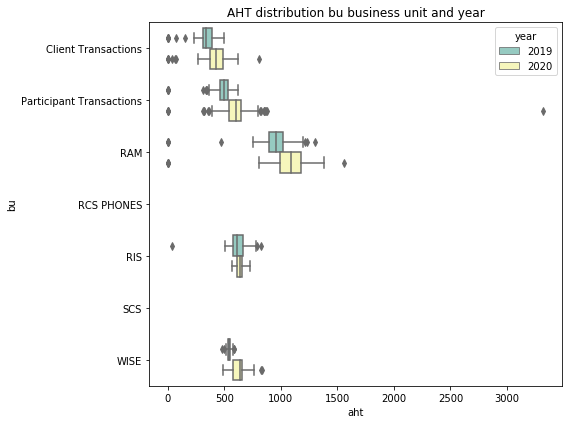

In [343]:
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.boxplot(x="aht", y="bu", hue="year",
                 data=df, palette="Set3")
plt.title('AHT distribution bu business unit and year')
plt.tight_layout()

# 2. Unplanned Out (%)

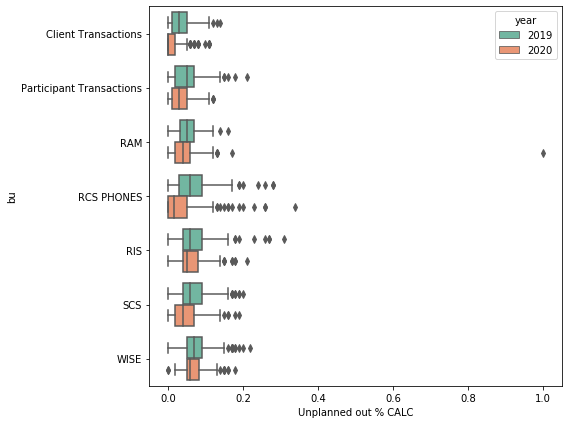

In [344]:
df['Unplanned out % CALC'] = pd.to_numeric(df['Unplanned out % CALC'].str.replace('%', ''), errors='coerce')/100

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Unplanned out % CALC', y="bu", hue="year",
                 data=df, palette="Set2")
plt.tight_layout()

# 3. Mean attrition (%)

In [345]:
g = df.groupby(['bu','month','year'])[['Attrition % CALC']].mean()

In [346]:
df[(df['date']=='2019-08-31')]

,date,bu,VOLUME - HANDLED,TOTAL TIME - AHT (sec),AHT CALC,Sum of PRODUCTIVE TIME - ACTUAL (hrs),Sum of PRODUCTIVE TIME - SCHEDULED (hrs),Conformance CALC,Attrition,EOM Headcount,Attrition % CALC,System Outage (hrs),Unplanned out,Shrinkage,Regular Scheduled Time (no OT),Unplanned out % CALC,Shrinkage % CALC,month,year,aht
1694,2019-08-31,Client Transactions,0,0,#DIV/0!,0.0,0.0,#DIV/0!,2,43,0.046512,0.0,0.0,0.0,0.0,NaN,#DIV/0!,August,2019,NaN
1695,2019-08-31,Participant Transactions,0,0,#DIV/0!,0.0,0.0,#DIV/0!,2,57,0.035088,0.0,0.0,0.0,0.0,NaN,#DIV/0!,August,2019,NaN
1696,2019-08-31,RAM,0,0,#DIV/0!,0.0,0.0,#DIV/0!,2,82,0.024390,0.0,0.0,0.0,0.0,NaN,#DIV/0!,August,2019,NaN
1697,2019-08-31,RCS PHONES,0,0,#DIV/0!,0.0,0.0,#DIV/0!,2,18,0.111111,0.0,0.0,0.0,0.0,NaN,#DIV/0!,August,2019,NaN
1698,2019-08-31,RIS,0,0,#DIV/0!,0.0,0.0,#DIV/0!,2,90,0.022222,0.0,0.0,0.0,0.0,NaN,#DIV/0!,August,2019,NaN
1699,2019-08-31,SCS,0,0,#DIV/0!,0.0,0.0,#DIV/0!,2,0,NaN,0.0,0.0,0.0,0.0,NaN,#DIV/0!,August,2019,NaN
1700,2019-08-31,WISE,0,0,#DIV/0!,0.0,0.0,#DIV/0!,2,298,0.006711,0.0,0.0,0.0,0.0,NaN,#DIV/0!,August,2019,NaN


In [347]:
def plot_bu(df, kpi, group='bu'):
    for i, bu in enumerate(df[group].unique()):
        plt.figure(figsize=(10,4), dpi=100)
        ax = sns.barplot(data=df[df[group]==bu], palette='viridis', x='month', y=kpi, hue='year', errwidth=0)
        plt.title(kpi+' - '+bu, y=1.08)
        
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            if kpi in ['occupancy', 'online time']:
                vals = ax.get_yticks()
                ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
                ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
            else:
                ax.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
        plt.ylabel('')
        plt.xlabel('')
        ax.legend(loc='right', bbox_to_anchor=(1.12,0.5))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        plt.show()

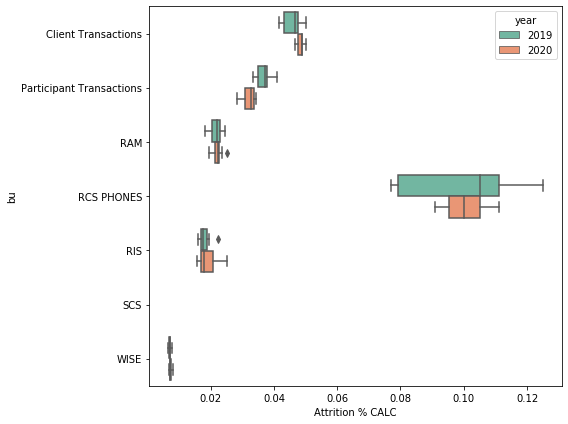

In [348]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Attrition % CALC', y="bu", hue="year",
                 data=df, palette="Set2")
plt.tight_layout()

# 4. Mean conformance (%)

In [349]:
df['Conformance CALC'] = pd.to_numeric(df['Conformance CALC'].str.replace('%', ''), errors='coerce')
df['Conformance CALC'].describe()

count    2393.000000
mean        0.939399
std         0.063872
min         0.000000
25%         0.922599
50%         0.954189
75%         0.972888
max         1.130215
Name: Conformance CALC, dtype: float64

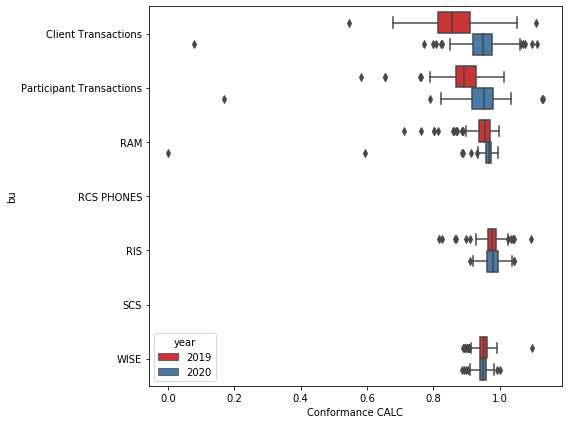

In [350]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Conformance CALC', y="bu", hue="year",
                 data=df, palette="Set1")
plt.tight_layout()

# 5. Mean monthly system outage (hours)

In [351]:
df['System Outage (hrs)'].describe()

count    4921.000000
mean        2.369369
std        12.400305
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       455.266667
Name: System Outage (hrs), dtype: float64

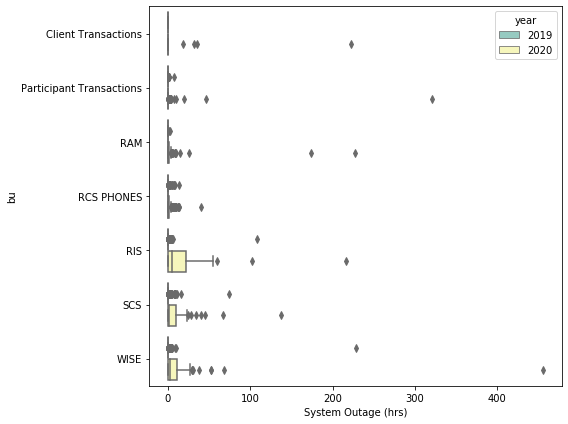

In [352]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='System Outage (hrs)', y="bu", hue="year",
                 data=df, palette="Set3")
plt.tight_layout()

# 6. Mean shrinkage (%)

In [353]:
df['Shrinkage % CALC'] = pd.to_numeric(df['Shrinkage % CALC'].str.replace('%', ''), errors='coerce')
df['Shrinkage % CALC'].describe()

count    3483.000000
mean       31.641975
std        10.368796
min         0.000000
25%        26.000000
50%        31.000000
75%        37.000000
max       100.000000
Name: Shrinkage % CALC, dtype: float64

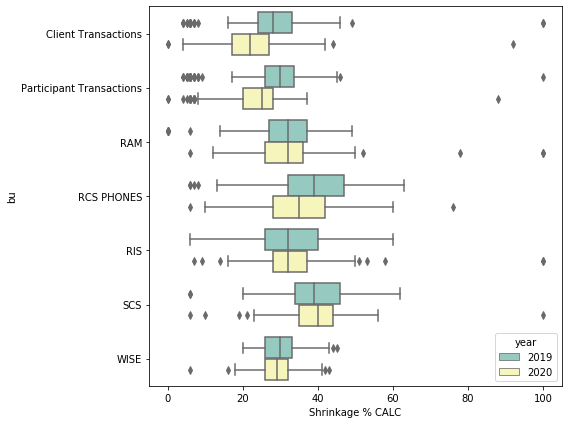

In [354]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Shrinkage % CALC', y="bu", hue="year",
                 data=df, palette="Set3")
plt.tight_layout()

In [355]:
df.to_csv('wfh3_weekends_clean.csv', index=False)